### Individual Homework

#### Enter your name here: Dhruv Chaudhari

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [3]:
movies = pd.read_csv(r'C:\Users\Asus\ACOD\Dhruv-Analytics-through-coding\Data_2\movies.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                2961 non-null   object 
 1   genre                2961 non-null   object 
 2   director             2961 non-null   object 
 3   year                 2961 non-null   int64  
 4   duration             2961 non-null   int64  
 5   gross                2961 non-null   int64  
 6   budget               2961 non-null   int64  
 7   cast_facebook_likes  2961 non-null   int64  
 8   votes                2961 non-null   int64  
 9   reviews              2961 non-null   int64  
 10  rating               2961 non-null   float64
dtypes: float64(1), int64(7), object(3)
memory usage: 254.6+ KB


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [10]:
movies.value_counts(movies['genre'])

genre
Comedy         848
Action         738
Drama          498
Adventure      288
Crime          202
Biography      135
Horror         131
Animation       35
Fantasy         28
Documentary     25
Mystery         16
Sci-Fi           7
Family           3
Romance          2
Musical          2
Western          2
Thriller         1
Name: count, dtype: int64

**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [23]:
movies_budget = movies

# In this part we have grouped by genre and then we have calculated the mean for both gross and budget
genre_stats = (
    movies_budget.groupby("genre")[["gross", "budget"]]
    .mean()
    .reset_index()
)

# In this part we have divided it because subtracting it would give us the average profit.
# and not the reutrn on budget in this case by dividing it is easier to calculate for a dollar invested what is the return for the same dollar
genre_stats['return_on_budget'] = genre_stats['gross']/genre_stats['budget'] 


In [24]:
genre_stats = genre_stats.sort_values("return_on_budget", ascending=False).reset_index(drop=True)
genre_stats

,genre,gross,budget,return_on_budget
0,Musical,9.208400e+07,3.189500e+06,28.870983
1,Family,1.491605e+08,1.483333e+07,10.055763
2,Western,2.082188e+07,3.465000e+06,6.009202
3,Documentary,1.735397e+07,5.887852e+06,2.947420
4,Horror,3.771374e+07,1.350492e+07,2.792593
5,Fantasy,4.240884e+07,1.758214e+07,2.412040
6,Comedy,4.263055e+07,2.444632e+07,1.743843
7,Mystery,6.753302e+07,3.921875e+07,1.721958
8,Animation,9.843379e+07,6.170143e+07,1.595324
9,Biography,4.520181e+07,2.854370e+07,1.583600


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [26]:
directors = movies

# To explore the different directors and their count 
directors['director'].value_counts()

director
Steven Spielberg     23
Clint Eastwood       19
Tim Burton           16
Martin Scorsese      16
Steven Soderbergh    15
                     ..
Jody Hill             1
Rob Pritts            1
William Wyler         1
Kevin Allen           1
Frank Whaley          1
Name: count, Length: 1366, dtype: int64

In [38]:
# Initialized a directors dataset with the required gross amount details with mean , median and standard deviation
directors = movies.groupby("director")["gross"].agg(
        total_gross="sum",
        mean_gross="mean",
        median_gross="median",
        std_gross="std"
    ).reset_index()

directors = directors.sort_values("total_gross", ascending=False).head(15)


In [39]:
directors

,director,total_gross,mean_gross,median_gross,std_gross
1233,Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
861,Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
1267,Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
1161,Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
513,James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
208,Christopher Nolan,1813227576,2.266534e+08,196667606.5,1.872241e+08
429,George Lucas,1741418480,3.482837e+08,380262555.0,1.461939e+08
1122,Robert Zemeckis,1619309108,1.245622e+08,100853835.0,9.130028e+07
216,Clint Eastwood,1378321100,7.254322e+07,46700000.0,7.548741e+07
387,Francis Lawrence,1358501971,2.717004e+08,281666058.0,1.354370e+08


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

In [41]:
ratings = movies.groupby("genre")["rating"].agg(
        mean_rating="mean",
        min_rating ='min',
        max_rating = 'max',
        median_rating="median",
        std_dev_rating="std"
    ).reset_index()

In [42]:
ratings

,genre,mean_rating,min_rating,max_rating,median_rating,std_dev_rating
0,Action,6.232249,2.1,9.0,6.30,1.030362
1,Adventure,6.506597,2.3,8.6,6.60,1.093881
2,Animation,6.651429,4.5,8.0,6.90,0.968131
3,Biography,7.114074,4.5,8.9,7.20,0.759827
4,Comedy,6.109670,1.9,8.8,6.20,1.023075
5,Crime,6.915347,4.8,9.3,6.90,0.849356
6,Documentary,6.660000,1.6,8.5,7.40,1.766588
7,Drama,6.731526,2.1,8.8,6.80,0.916993
8,Family,6.500000,5.7,7.9,5.90,1.216553
9,Fantasy,6.153571,4.3,7.9,6.45,0.958966


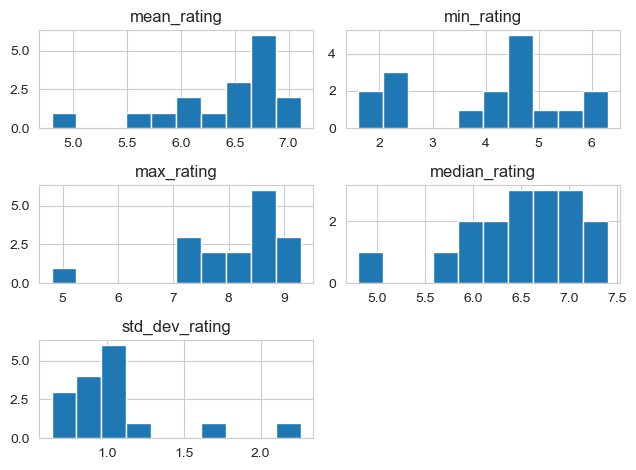

In [ ]:

ratings.hist()
plt.tight_layout()
plt.show()

In [59]:

# jupyter nbcovert --to html "name of file"


# # The following histogram shows the distribution of the mean ratings for different 
# plt.figure(figsize=(10,6))
# plt.hist(ratings['genre'], ratings['mean_rating'], color='skyblue')
# plt.xticks(rotation=45, ha='right')
# plt.ylabel('Mean Rating')
# plt.xlabel('Genre')
# plt.title('Basic Histogram of Ratings by Genre')
# plt.tight_layout()
# plt.show()

**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

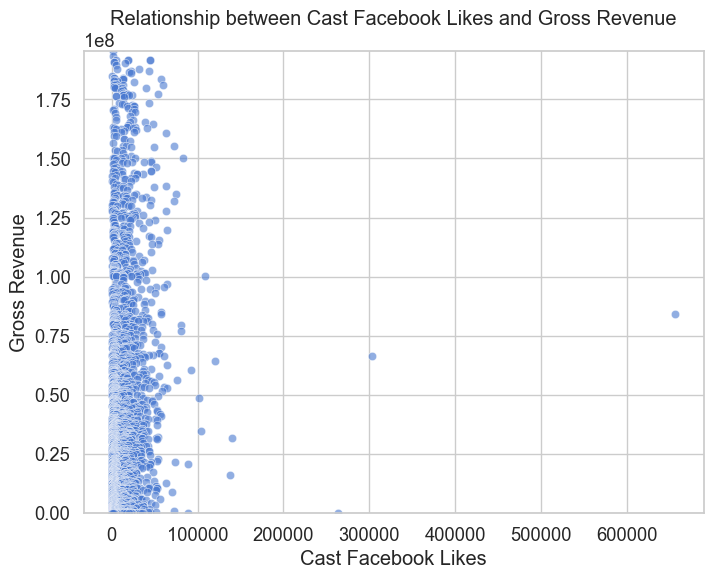

In [7]:
# Set a consistent style for all plots
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


# 1. Gross vs Cast Facebook Likes
plt.figure(figsize=(8,6))
sns.scatterplot(x="cast_facebook_likes", y="gross", data=movies, alpha=0.6)
plt.title("Relationship between Cast Facebook Likes and Gross Revenue")
plt.xlabel("Cast Facebook Likes")
plt.ylabel("Gross Revenue")
plt.ylim(0, movies['gross'].quantile(0.95))  # Limit y-axis to avoid extreme outliers
plt.show()

# Interpretation:
# There seems to be some positive trend, but cast_facebook_likes alone is not a strong predictor of box office revenue.



**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

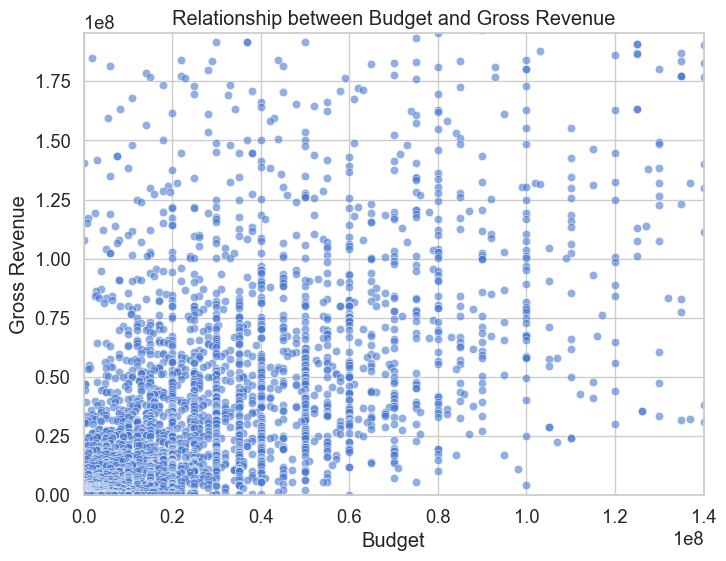

In [8]:
# 2. Gross vs Budget
plt.figure(figsize=(8,6))
sns.scatterplot(x="budget", y="gross", data=df, alpha=0.6)
plt.title("Relationship between Budget and Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.ylim(0, movies['gross'].quantile(0.95))
plt.xlim(0, movies['budget'].quantile(0.95))
plt.show()

# Interpretation:
# Budget tends to be a better predictor of gross revenue than cast Facebook likes, though the relationship is not perfectly linear.


**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

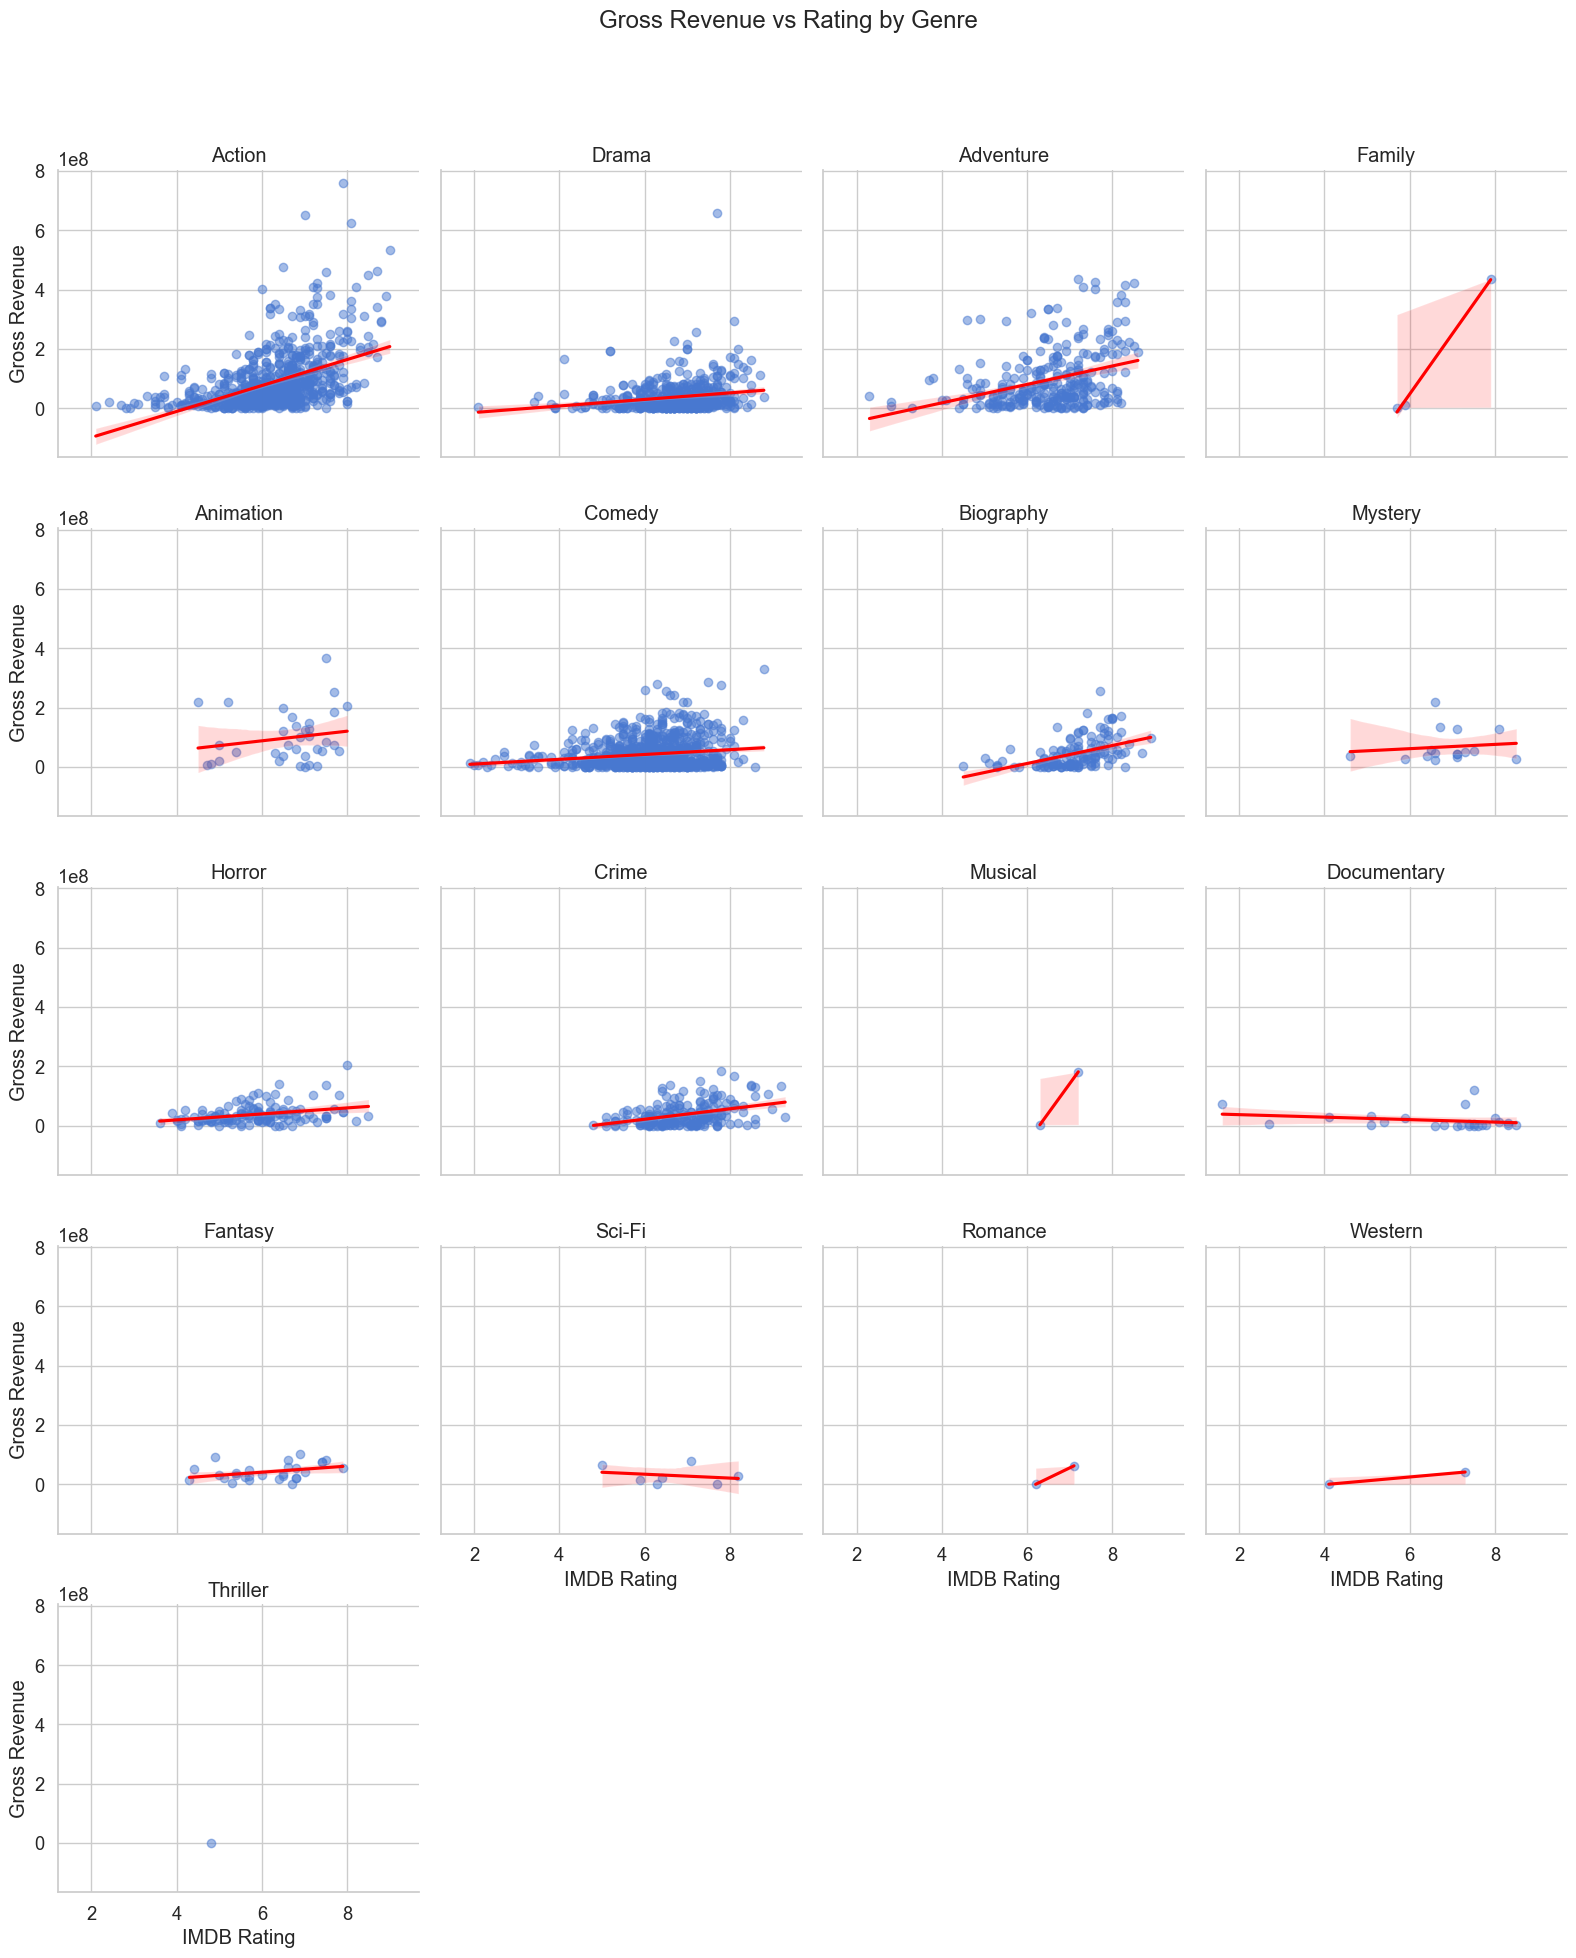

In [9]:
# 3. Gross vs Rating, faceted by Genre
g = sns.lmplot(x="rating", y="gross", col="genre", data=movies,
               col_wrap=4, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, height=4)
g.set_titles("{col_name}")
g.set_axis_labels("IMDB Rating", "Gross Revenue")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Gross Revenue vs Rating by Genre")
plt.show()

# Interpretation:
# Ratings do not show a very strong relationship with gross revenue across most genres. 
# Strange observation: Some genres may have outliers (e.g., high gross despite average rating).



**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.